# 1 - Déploiement de l’environnement

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import scipy as sc
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 2 - Sources de données : Manipulation

In [2]:
data_csv=pd.read_csv('credit_immo\credit_immo.csv')
data_json=pd.read_json('credit_immo\credit_immo.json')
data_xls=pd.read_excel('credit_immo\credit_immo.xls')

print(data_csv)

      ID_NOM  Niv_Etude_Bac  age contrat_de_travail  Salaire  \
0       jean            3.0   45                CDI    40000   
1    VANESSA            5.0   28                CDI    30500   
2   TARCISSE            0.0   55                CDI    28000   
3    TIBAULT            4.0   23                CDD    15000   
4      GILES            0.0   33                CDD    27000   
5      ETHAN            0.0   41            INTERIM    40000   
6    LILIANE           -1.0   29                CDI    50000   
7      GLODI           -3.0   24            INTERIM    29000   
8   FLORIANE            NaN   26                CDI    44000   
9      MARIE            3.0   37                CDI    45800   
10   BAKAMBU            2.0   40                CDI    60000   
11     FATOU            0.0   38                CDD    26000   
12      WUAN           -3.0   39            INTERIM    29000   
13      HUGO            0.0   31                CDI    43000   
14    JOSEPH            1.0   70        

In [3]:
print(data_json)

    Salaire    ID_NOM  dette_anterieure  apport contrat_de_travail  \
0     40000      jean              4000     0.3                CDI   
1     30500   VANESSA              1320     0.1                CDI   
2     28000  TARCISSE             40000     0.0                CDI   
3     15000   TIBAULT                 0     0.1                CDD   
4     27000     GILES              3000     0.1                CDD   
5     40000     ETHAN              1000     0.0            INTERIM   
6     50000   LILIANE              3000     0.0                CDI   
7     29000     GLODI              5000     0.0            INTERIM   
8     44000  FLORIANE                 0     0.1                CDI   
9     45800     MARIE              2000     0.2                CDI   
10    60000   BAKAMBU              1500     0.3                CDI   
11    26000     FATOU              8000     0.4                CDD   
12    29000      WUAN              4900     0.0            INTERIM   
13    43000      HUG

In [4]:
print(data_xls)

      ID_NOM  Niv_Etude_Bac  age contrat_de_travail  Salaire  \
0       jean            3.0   45                CDI    40000   
1    VANESSA            5.0   28                CDI    30500   
2   TARCISSE            0.0   55                CDI    28000   
3    TIBAULT            4.0   23                CDD    15000   
4      GILES            0.0   33                CDD    27000   
5      ETHAN            0.0   41            INTERIM    40000   
6    LILIANE           -1.0   29                CDI    50000   
7      GLODI           -3.0   24            INTERIM    29000   
8   FLORIANE            NaN   26                CDI    44000   
9      MARIE            3.0   37                CDI    45800   
10   BAKAMBU            2.0   40                CDI    60000   
11     FATOU            0.0   38                CDD    26000   
12      WUAN           -3.0   39            INTERIM    29000   
13      HUGO            0.0   31                CDI    43000   
14    JOSEPH            1.0   70        

In [5]:
a=np.random.randint(1,10,4)
b=np.random.randint(1,10,4)
c=np.random.randint(1,10,4)
d=np.random.randint(1,10,4)
e=np.random.randint(1,10,4)
ar=np.array([a,b,c,d,e])


tab= pd.DataFrame(ar, index = ['1', '2', '3','4','5'], columns = ['taux_de_ventes', 'croissance_vente', 'ratio_benefice', 'ratio_perte'])

print(tab)

   taux_de_ventes  croissance_vente  ratio_benefice  ratio_perte
1               6                 1               1            7
2               6                 4               9            5
3               1                 1               5            7
4               5                 3               1            1
5               6                 5               5            2


In [6]:
tab=tab.reindex(['1', '2', '3','4','5','6'])
print(tab)

   taux_de_ventes  croissance_vente  ratio_benefice  ratio_perte
1             6.0               1.0             1.0          7.0
2             6.0               4.0             9.0          5.0
3             1.0               1.0             5.0          7.0
4             5.0               3.0             1.0          1.0
5             6.0               5.0             5.0          2.0
6             NaN               NaN             NaN          NaN


In [7]:
tab.isnull()

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,True,True,True,True


In [8]:
tab.fillna(0)


,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
1,6.0,1.0,1.0,7.0
2,6.0,4.0,9.0,5.0
3,1.0,1.0,5.0,7.0
4,5.0,3.0,1.0,1.0
5,6.0,5.0,5.0,2.0
6,0.0,0.0,0.0,0.0


In [9]:
tab.dropna()

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
1,6.0,1.0,1.0,7.0
2,6.0,4.0,9.0,5.0
3,1.0,1.0,5.0,7.0
4,5.0,3.0,1.0,1.0
5,6.0,5.0,5.0,2.0


# 3 - Traitement des données

In [10]:
data_csv

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45,CDI,40000,4000,M,0.3,3.0,OUI
1,VANESSA,5.0,28,CDI,30500,1320,M,0.1,0.0,OUI
2,TARCISSE,0.0,55,CDI,28000,40000,C,0.0,0.0,NON
3,TIBAULT,4.0,23,CDD,15000,0,M,0.1,NaN,OUI
4,GILES,0.0,33,CDD,27000,3000,C,0.1,2.0,NON
5,ETHAN,0.0,41,INTERIM,40000,1000,M,0.0,4.0,NON
6,LILIANE,-1.0,29,CDI,50000,3000,C,0.0,0.0,NON
7,GLODI,-3.0,24,INTERIM,29000,5000,C,0.0,0.0,NON
8,FLORIANE,NaN,26,CDI,44000,0,M,0.1,1.0,OUI
9,MARIE,3.0,37,CDI,45800,2000,M,0.2,2.0,OUI


In [11]:
data_csv.dtypes

ID_NOM                 object
Niv_Etude_Bac         float64
age                     int64
contrat_de_travail     object
Salaire                 int64
dette_anterieure        int64
etat_civile            object
apport                float64
enfant_a_Charge       float64
Solvable               object
dtype: object

In [12]:
data_csv.isna().sum()

ID_NOM                0
Niv_Etude_Bac         1
age                   0
contrat_de_travail    0
Salaire               0
dette_anterieure      0
etat_civile           0
apport                0
enfant_a_Charge       1
Solvable              0
dtype: int64

In [13]:
numero=data_csv.select_dtypes(exclude=['object']).columns
numero

Index(['Niv_Etude_Bac', 'age', 'Salaire', 'dette_anterieure', 'apport',
       'enfant_a_Charge'],
      dtype='object')

In [14]:
imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')
imputer = imputer.fit(data_csv[numero]) 
data_csv[numero] = imputer.transform(data_csv[numero]).round(1)
data_csv.head(9)

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45.0,CDI,40000.0,4000.0,M,0.3,3.0,OUI
1,VANESSA,5.0,28.0,CDI,30500.0,1320.0,M,0.1,0.0,OUI
2,TARCISSE,0.0,55.0,CDI,28000.0,40000.0,C,0.0,0.0,NON
3,TIBAULT,4.0,23.0,CDD,15000.0,0.0,M,0.1,1.3,OUI
4,GILES,0.0,33.0,CDD,27000.0,3000.0,C,0.1,2.0,NON
5,ETHAN,0.0,41.0,INTERIM,40000.0,1000.0,M,0.0,4.0,NON
6,LILIANE,-1.0,29.0,CDI,50000.0,3000.0,C,0.0,0.0,NON
7,GLODI,-3.0,24.0,INTERIM,29000.0,5000.0,C,0.0,0.0,NON
8,FLORIANE,1.4,26.0,CDI,44000.0,0.0,M,0.1,1.0,OUI


In [15]:
data_csv.isna().sum()

ID_NOM                0
Niv_Etude_Bac         0
age                   0
contrat_de_travail    0
Salaire               0
dette_anterieure      0
etat_civile           0
apport                0
enfant_a_Charge       0
Solvable              0
dtype: int64

In [16]:
obj=data_csv.select_dtypes(include=['object'])
obj

,ID_NOM,contrat_de_travail,etat_civile,Solvable
0,jean,CDI,M,OUI
1,VANESSA,CDI,M,OUI
2,TARCISSE,CDI,C,NON
3,TIBAULT,CDD,M,OUI
4,GILES,CDD,C,NON
5,ETHAN,INTERIM,M,NON
6,LILIANE,CDI,C,NON
7,GLODI,INTERIM,C,NON
8,FLORIANE,CDI,M,OUI
9,MARIE,CDI,M,OUI


In [17]:
obj=obj.iloc[:,1:4]
obj

,contrat_de_travail,etat_civile,Solvable
0,CDI,M,OUI
1,CDI,M,OUI
2,CDI,C,NON
3,CDD,M,OUI
4,CDD,C,NON
5,INTERIM,M,NON
6,CDI,C,NON
7,INTERIM,C,NON
8,CDI,M,OUI
9,CDI,M,OUI


In [18]:
for i in obj.columns:
    le = preprocessing.LabelEncoder()
    le.fit(data_csv[i])
    data_csv[i] = le.transform(data_csv[i])

data_csv

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45.0,1,40000.0,4000.0,1,0.3,3.0,1
1,VANESSA,5.0,28.0,1,30500.0,1320.0,1,0.1,0.0,1
2,TARCISSE,0.0,55.0,1,28000.0,40000.0,0,0.0,0.0,0
3,TIBAULT,4.0,23.0,0,15000.0,0.0,1,0.1,1.3,1
4,GILES,0.0,33.0,0,27000.0,3000.0,0,0.1,2.0,0
5,ETHAN,0.0,41.0,3,40000.0,1000.0,1,0.0,4.0,0
6,LILIANE,-1.0,29.0,1,50000.0,3000.0,0,0.0,0.0,0
7,GLODI,-3.0,24.0,3,29000.0,5000.0,0,0.0,0.0,0
8,FLORIANE,1.4,26.0,1,44000.0,0.0,1,0.1,1.0,1
9,MARIE,3.0,37.0,1,45800.0,2000.0,1,0.2,2.0,1


In [19]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [20]:
x=data_csv.iloc[:,1:8]
y=data_csv['Solvable']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
len(x_train)

15

In [21]:
len(x_test)

4

In [23]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x_test)
print(scaled_data)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(x_train)
print(scaled_data)

[[-0.75370758  1.58525817  0.          1.43888423  0.83901318  0.
   1.73205081]
 [ 1.30185855 -0.65275337  0.         -0.57044523  0.53391748  0.
  -0.57735027]
 [-1.16482081 -1.02575529  0.          0.34907842 -1.703451    0.
  -0.57735027]
 [ 0.61666984  0.09325048  0.         -1.21751742  0.33052034  0.
  -0.57735027]]
[[ 0.          2.57921231 -1.14763808  0.02170312  0.08769157 -1.22474487
   1.17953565]
 [ 2.56173769  0.62031688 -0.19127301  1.60422225 -0.26996286  0.81649658
  -1.03209369]
 [-0.73192505 -0.76723404 -0.19127301  0.24777728 -0.46865977 -1.22474487
  -1.03209369]
 [-0.36596253 -0.44075147 -1.14763808 -0.79216386 -0.46865977 -1.22474487
  -0.29488391]
 [-0.36596253  1.35490267 -0.19127301 -0.74694903  1.00169734 -1.22474487
  -1.03209369]
 [-0.36596253  0.21221367  1.72145713 -0.20437104 -0.54813854  0.81649658
  -1.03209369]
 [-0.36596253 -0.60399276 -0.19127301 -0.06872655  3.38606023  0.81649658
   0.44232587]
 [ 0.73192505 -0.1142689  -0.19127301  0.05787499 -0

# 4 - Visualisation de données

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
montant_temps=pd.read_csv('Montant_Temps.csv')
montant_temps.head(6)

,Montant_du_capitale,Temps
0,1,5
1,12,6
2,13,7
3,2,8
4,3,9
5,0,10


In [54]:
montant=montant_temps.iloc[:,:1]
montant

,Montant_du_capitale
0,1
1,12
2,13
3,2
4,3
5,0
6,1
7,6
8,7
9,4


In [51]:
temps=montant_temps.iloc[:,1:]
temps

,Temps
0,5
1,6
2,7
3,8
4,9
5,10
6,11
7,12
8,13
9,14


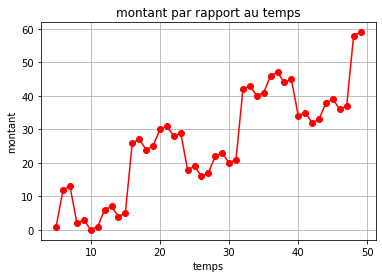

In [67]:
plt.plot(temps, montant, "-o", color="red")
plt.title("montant par rapport au temps")
plt.xlabel("temps")
plt.ylabel("montant")
plt.grid()

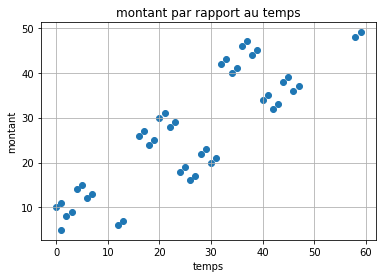

In [71]:
plt.scatter(montant, temps)
plt.title("montant par rapport au temps")
plt.xlabel("temps")
plt.ylabel("montant")
plt.grid()

# 5 - Analyse de données

In [73]:
data_tc=pd.read_csv("tendance_centrale.csv")
data_tc

,Nom,Age,Rating
0,ANATOLE,55,4.53
1,Vincent,59,3.54
2,Brenda,55,3.98
3,Philippe,53,5.59
4,Michel,30,3.50
5,Tillier,59,4.90
6,Blanchard,53,3.80
7,perez,34,3.78
8,théo,40,5.98
9,cyprien,30,4.80


In [78]:
moy_age=data_tc['Age'].mean()
moy_age

45.64705882352941

In [79]:
med_age=data_tc['Age'].median()
med_age

49.0

In [83]:
import pandas as pd
import numpy as np
from scipy.stats import f
df = pd.data_tc.from_dict({'g1': [5,9,10,12,8,8,9], 
                        'g2': [5,4, 4, 5,5,4,8], 
                        'g3': [9,8, 5, 6,7,7,6]})

df

AttributeError: module 'pandas' has no attribute 'data_tc'